In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Importamos la base de datos
df = pd.read_csv('student_performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# Normalizamos los datos
df.loc[df['Extracurricular Activities'] == 'Yes', 'Extracurricular Activities'] = 1
df.loc[df['Extracurricular Activities'] == 'No', 'Extracurricular Activities'] = 0
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [4]:
# Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
# Descripción de los datos
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Entrenanamiento - Horas de estudio

In [6]:
# Separamos la información
X = df['Hours Studied'].values.reshape(-1,1)
y = df['Performance Index']

In [7]:
# Entrenamos el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

### Evaluación de resultados

In [9]:
# Evaluación de predicción
y_pred = regr.predict(X_test)

In [10]:
# Valores relaes vs. predicción
pd.DataFrame({
    'Actual Performance': y_test,
    'Predicted Performance': y_pred
})

,Actual Performance,Predicted Performance
6252,51.0,55.358137
4684,20.0,47.005236
1731,46.0,60.926738
4742,28.0,58.142437
4521,41.0,60.926738
...,...,...
6412,45.0,47.005236
8285,66.0,52.573837
7853,16.0,47.005236
1095,65.0,49.789536


In [11]:
print('Coeficientes: \n', [regr.intercept_, regr.coef_])

# Calculamos el error cuadrado medio
print('Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))

# Calculamos el coeficiente de determinación: 1 es predicción perfecta
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))


Coeficientes: 
 [41.436634826535744, array([2.78430044])]
Error cuadrado medio: 321.81
Coeficiente de determinación: 0.13


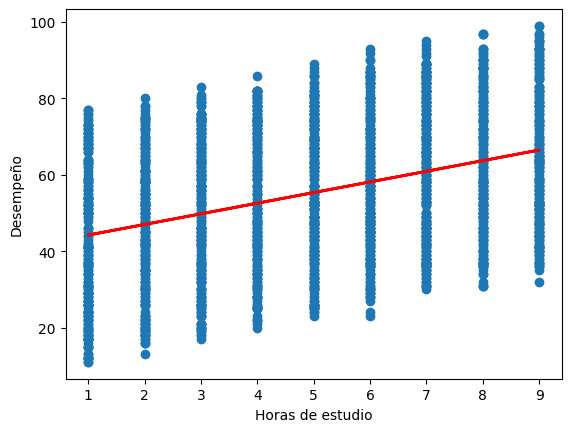

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.ylabel('Desempeño')
plt.xlabel('Horas de estudio')
plt.show()

## Entrenanamiento - Rendimiento previo

In [13]:
# Separamos la información
X = df['Previous Scores'].values.reshape(-1,1)
y = df['Performance Index']

In [14]:
# Entrenamos el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

### Evaluación de resultados

In [16]:
# Evaluación de predicción
y_pred = regr.predict(X_test)

In [17]:
# Valores relaes vs. predicción
pd.DataFrame({
    'Actual Performance': y_test,
    'Predicted Performance': y_pred
})

,Actual Performance,Predicted Performance
6252,51.0,54.773742
4684,20.0,31.481016
1731,46.0,41.608288
4742,28.0,27.430107
4521,41.0,38.570107
...,...,...
6412,45.0,55.786469
8285,66.0,64.901014
7853,16.0,25.404653
1095,65.0,68.951923


In [18]:
print('Coeficientes: \n', [regr.intercept_, regr.coef_])

# Calculamos el error cuadrado medio
print('Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))

# Calculamos el coeficiente de determinación: 1 es predicción perfecta
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))


Coeficientes: 
 [-15.10443514609134, array([1.0127272])]
Error cuadrado medio: 58.95
Coeficiente de determinación: 0.84


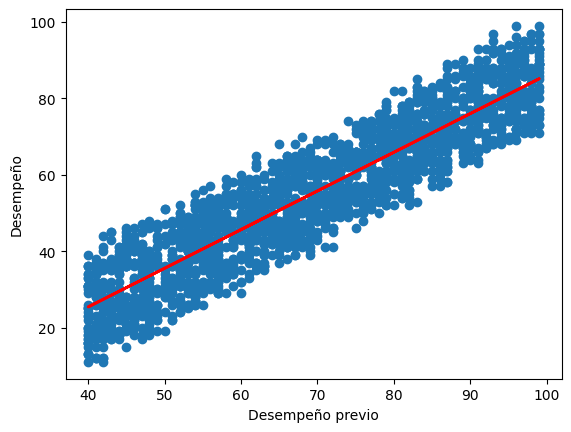

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.ylabel('Desempeño')
plt.xlabel('Desempeño previo')
plt.show()

## Entrenanamiento - Horas de sueño

In [20]:
# Separamos la información
X = df['Sleep Hours'].values.reshape(-1,1)
y = df['Performance Index']

In [21]:
# Entrenamos el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

## Evaluación de resultados

In [23]:
# Evaluación de predicción
y_pred = regr.predict(X_test)

In [24]:
# Valores relaes vs. predicción
pd.DataFrame({
    'Actual Performance': y_test,
    'Predicted Performance': y_pred
})

,Actual Performance,Predicted Performance
6252,51.0,56.044113
4684,20.0,54.034718
1731,46.0,55.541764
4742,28.0,56.044113
4521,41.0,54.034718
...,...,...
6412,45.0,55.541764
8285,66.0,56.546462
7853,16.0,55.541764
1095,65.0,55.541764


In [25]:
print('Coeficientes: \n', [regr.intercept_, regr.coef_])

# Calculamos el error cuadrado medio
print('Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))

# Calculamos el coeficiente de determinación: 1 es predicción perfecta
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))


Coeficientes: 
 [52.02532258009736, array([0.50234879])]
Error cuadrado medio: 369.44
Coeficiente de determinación: 0.00


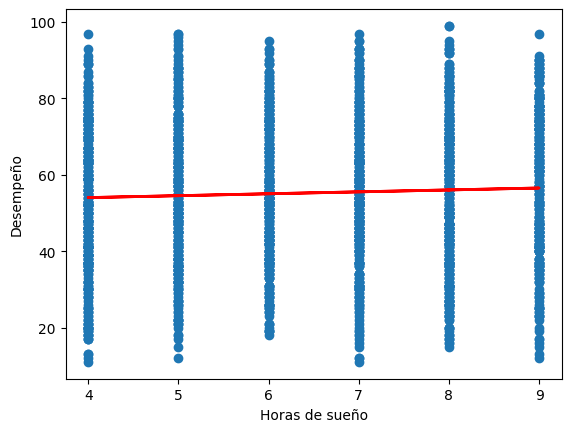

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.ylabel('Desempeño')
plt.xlabel('Horas de sueño')
plt.show()